In [23]:
import pandas as pd

print(pd.__version__)

2.1.4


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('Knicks_Per_Game_data.txt')
Knicks_All_Seasons_data = data.copy()
Knicks_All_Seasons_data

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2023-24,NBA,NYK,41,27,2,NaN,26.4,6-5,218.0,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,17.7,112.0
1,2022-23,NBA,NYK,47,35,3,NaN,24.5,6-6,218.0,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,20.3,116.0
2,2021-22,NBA,NYK,37,45,5,NaN,26.0,6-6,218.0,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,20.4,106.5
3,2020-21,NBA,NYK,41,31,3,NaN,25.6,6-6,217.0,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,20.5,107.0
4,2019-20,NBA,NYK,21,45,5,NaN,24.5,6-6,222.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,22.2,105.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1950-51,NBA,NYK,36,30,3,NaN,NaN,NaN,NaN,...,0.714,NaN,NaN,51.8,23.5,NaN,NaN,NaN,27.4,85.8
74,1949-50,NBA,NYK,40,28,2,NaN,NaN,NaN,NaN,...,0.711,NaN,NaN,NaN,19.2,NaN,NaN,NaN,25.3,80.7
75,1948-49,BAA,NYK,32,28,2,NaN,NaN,NaN,NaN,...,0.702,NaN,NaN,NaN,17.0,NaN,NaN,NaN,26.0,79.2
76,1947-48,BAA,NYK,26,22,2,NaN,NaN,NaN,NaN,...,0.672,NaN,NaN,NaN,7.8,NaN,NaN,NaN,22.4,74.5


In [26]:
Knicks_ASD_df = pd.DataFrame(Knicks_All_Seasons_data)

print("Column headers:")
print(Knicks_ASD_df.columns)

Column headers:
Index(['Season', 'Lg', 'Tm', 'W', 'L', 'Finish', 'Unnamed: 6', 'Age', 'Ht.',
       'Wt.', 'Unnamed: 10', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [27]:
# Define the columns you want to use
columns_to_use = ['Season', 'W', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

# Load the CSV file with only the selected columns
All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt', usecols=columns_to_use)

# Extract the starting year of each season
All_Seasons_df['Starting_Year'] = All_Seasons_df['Season'].str.split('-').str[0]

for col in columns_to_use[1:]:
    All_Seasons_df[col] = All_Seasons_df[col].astype(float)

# Filter the DataFrame to exclude rows before the 1979 season
All_Seasons_df = All_Seasons_df[All_Seasons_df['Starting_Year'].astype(int) >= 2000]

All_Seasons_df['3P%'] = All_Seasons_df['3P%'] * 100

# Take out the pulled first portion of 'Season'
All_Seasons_df.drop(columns=['Starting_Year'], inplace=True)

# Display the first few rows of the DataFrame to verify
print(All_Seasons_df.head())


    Season     W    FG   FGA    FG%    3P   3PA   3P%    2P   2PA  ...   FTA  \
0  2023-24  41.0  40.8  88.6  0.461  13.0  35.9  36.2  27.8  52.7  ...  22.1   
1  2022-23  47.0  42.0  89.4  0.470  12.6  35.7  35.4  29.4  53.6  ...  25.5   
2  2021-22  37.0  37.7  86.2  0.437  13.2  36.9  35.7  24.5  49.3  ...  24.1   
3  2020-21  41.0  39.4  86.5  0.456  11.8  30.0  39.2  27.7  56.4  ...  20.9   
4  2019-20  21.0  40.0  89.3  0.447   9.6  28.4  33.7  30.4  61.0  ...  23.5   

     FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PTS  
0  0.785  12.9  33.0  45.9  23.8  7.3  4.1  13.4  112.0  
1  0.761  12.6  34.0  46.6  22.9  6.4  4.1  13.0  116.0  
2  0.744  11.5  34.6  46.1  21.9  7.0  4.9  13.3  106.5  
3  0.784   9.7  35.5  45.1  21.4  7.0  5.1  12.9  107.0  
4  0.694  12.0  34.5  46.5  22.1  7.6  4.7  14.3  105.8  

[5 rows x 22 columns]


In [28]:
Knicks_Payroll = pd.read_csv('Knicks_Payroll_2000.csv')
Payroll_df = pd.DataFrame(Knicks_Payroll)

In [29]:
Payroll_df

,Season,Payroll
0,2023-24,163965182.0
1,2022-23,146569910.0
2,2021-22,119711411.0
3,2020-21,99121820.0
4,2019-20,110355759.0
5,2018-19,123388448.0
6,2017-18,104405157.0
7,2016-17,103595894.0
8,2015-16,75311181.0
9,2014-15,83022165.0


In [34]:
print(Season_Payroll.columns)

Index([' Season', ' Payroll '], dtype='object')


In [35]:
Season_Payroll

,Season,Payroll
0,2023-24,163965182.0
1,2022-23,146569910.0
2,2021-22,119711411.0
3,2020-21,99121820.0
4,2019-20,110355759.0
5,2018-19,123388448.0
6,2017-18,104405157.0
7,2016-17,103595894.0
8,2015-16,75311181.0
9,2014-15,83022165.0


In [36]:
print(Season_Payroll.dtypes)

 Season       object
 Payroll     float64
dtype: object


In [37]:
All_Seasons_With_Payroll = All_Seasons_df.join(Season_Payroll, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)

In [38]:
print(All_Seasons_With_Payroll.dtypes)

Season        object
W            float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PTS          float64
 Season       object
 Payroll     float64
dtype: object


In [39]:
print(All_Seasons_With_Payroll['Season'])

0     2023-24
1     2022-23
2     2021-22
3     2020-21
4     2019-20
5     2018-19
6     2017-18
7     2016-17
8     2015-16
9     2014-15
10    2013-14
11    2012-13
12    2011-12
13    2010-11
14    2009-10
15    2008-09
16    2007-08
17    2006-07
18    2005-06
19    2004-05
20    2003-04
21    2002-03
22    2001-02
23    2000-01
Name: Season, dtype: object


In [40]:
Full_df = All_Seasons_With_Payroll.drop(' Season', axis=1)

In [41]:
Full_df

,Season,W,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Payroll
0,2023-24,41.0,40.8,88.6,0.461,13.0,35.9,36.2,27.8,52.7,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,112.0,163965182.0
1,2022-23,47.0,42.0,89.4,0.470,12.6,35.7,35.4,29.4,53.6,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,116.0,146569910.0
2,2021-22,37.0,37.7,86.2,0.437,13.2,36.9,35.7,24.5,49.3,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,106.5,119711411.0
3,2020-21,41.0,39.4,86.5,0.456,11.8,30.0,39.2,27.7,56.4,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,107.0,99121820.0
4,2019-20,21.0,40.0,89.3,0.447,9.6,28.4,33.7,30.4,61.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,105.8,110355759.0
5,2018-19,17.0,38.2,88.3,0.433,10.0,29.5,34.0,28.2,58.8,...,0.759,10.5,34.3,44.7,20.1,6.8,5.1,14.0,104.6,123388448.0
6,2017-18,29.0,40.7,87.7,0.464,8.2,23.3,35.2,32.5,64.4,...,0.787,10.5,33.6,44.0,23.3,6.7,5.1,14.7,104.5,104405157.0
7,2016-17,31.0,39.6,88.5,0.447,8.6,24.7,34.8,31.0,63.8,...,0.788,12.0,33.2,45.2,21.8,7.1,5.5,13.9,104.3,103595894.0
8,2015-16,32.0,36.9,84.0,0.439,7.4,21.5,34.6,29.4,62.5,...,0.805,10.4,34.0,44.4,20.5,5.7,5.7,13.4,98.4,75311181.0
9,2014-15,17.0,35.1,82.0,0.428,6.8,19.7,34.7,28.3,62.3,...,0.769,10.6,29.8,40.4,21.3,7.0,4.7,14.7,91.9,83022165.0


In [42]:
Dollar_per_Point_df = Full_df[' Payroll ']/Full_df['PTS']

In [47]:
Dollar_per_Point_Per_Game_rounded_df = Dollar_per_Point_df.apply(lambda x: round(x, 2))
Dollar_per_Point_Per_Game_rounded_df

0     1463974.84
1     1263533.71
2     1124050.81
3      926372.15
4     1043060.10
5     1179621.87
6      999092.41
7      993249.22
8      765357.53
9      903396.79
10     892557.14
11     779708.93
12     779223.84
13     633710.48
14     839471.85
15     918665.84
16     992674.04
17    1203598.63
18    1324593.08
19    1054137.09
20     972226.30
21     974477.36
22     938788.64
23     834360.07
dtype: float64

In [49]:
print(Full_df.columns)

Index(['Season', 'W', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', ' Payroll '],
      dtype='object')


In [45]:
DPPG_Mill_df = Dollar_per_Point_Per_Game_rounded_df / 1000000

In [46]:
DPPG_Mill_df

0     1.463975
1     1.263534
2     1.124051
3     0.926372
4     1.043060
5     1.179622
6     0.999092
7     0.993249
8     0.765358
9     0.903397
10    0.892557
11    0.779709
12    0.779224
13    0.633710
14    0.839472
15    0.918666
16    0.992674
17    1.203599
18    1.324593
19    1.054137
20    0.972226
21    0.974477
22    0.938789
23    0.834360
dtype: float64

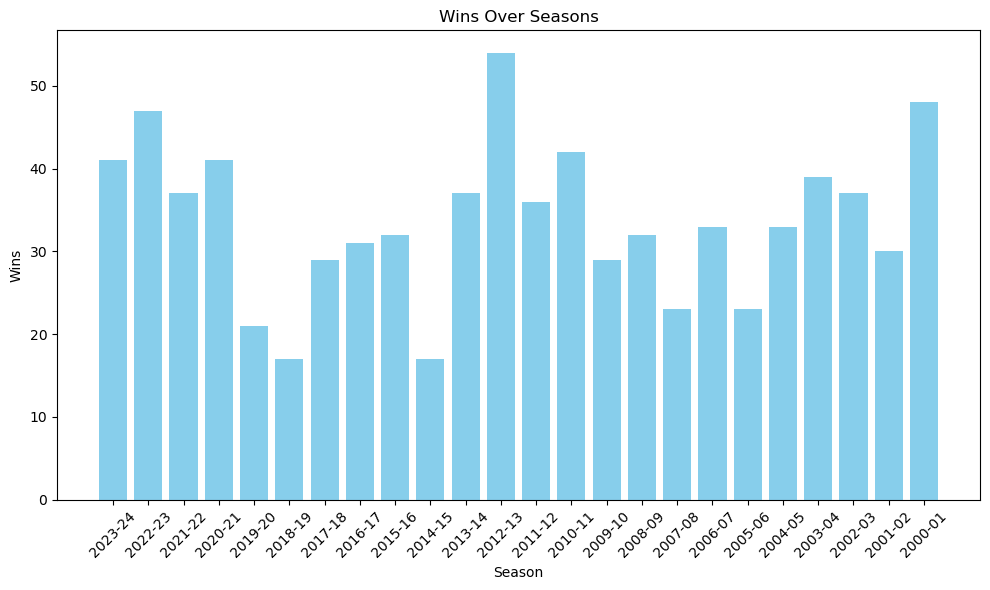

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(Full_df['Season'], Full_df['W'], color='skyblue')
plt.title('Wins Over Seasons')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(Full_df['Season'], Full_df['W'], color='skyblue')
plt.title('Wins Over Seasons')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()